In [1]:
# Titanic Dataset
from IPython.display import Image
Image(url= "https://media.giphy.com/media/OJw4CDbtu0jde/giphy.gif")

In [2]:
# importing the necessary libraries.

In [3]:
# General Packages
import pandas as pd
import numpy as np
import sklearn
import pylab as pl
import datetime
import seaborn as sns


# Visualization
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt # Plot the graphes


# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score



from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

%matplotlib inline
sns.set() # setting seaborn default for plots

import warnings
pd.options.mode.chained_assignment = None  # default='warn'
warnings.simplefilter("ignore", UserWarning)
warnings.filterwarnings(action='ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)


In [4]:
# Data

In [5]:
# download data from source 
import webbrowser
#webbrowser.open("https://www.kaggle.com/c/titanic")

In [6]:
titanic_data = pd.read_csv('train.csv')
print('Number of Rows:', len(titanic_data))
print('Columns:', list(titanic_data.columns))

Number of Rows: 891
Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Nationality', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [7]:
dataTest = pd.read_csv('test.csv')

In [8]:
# Data Exploration

In [9]:
# to get a sense of the data. 
# Look for patterns to measure statistically.

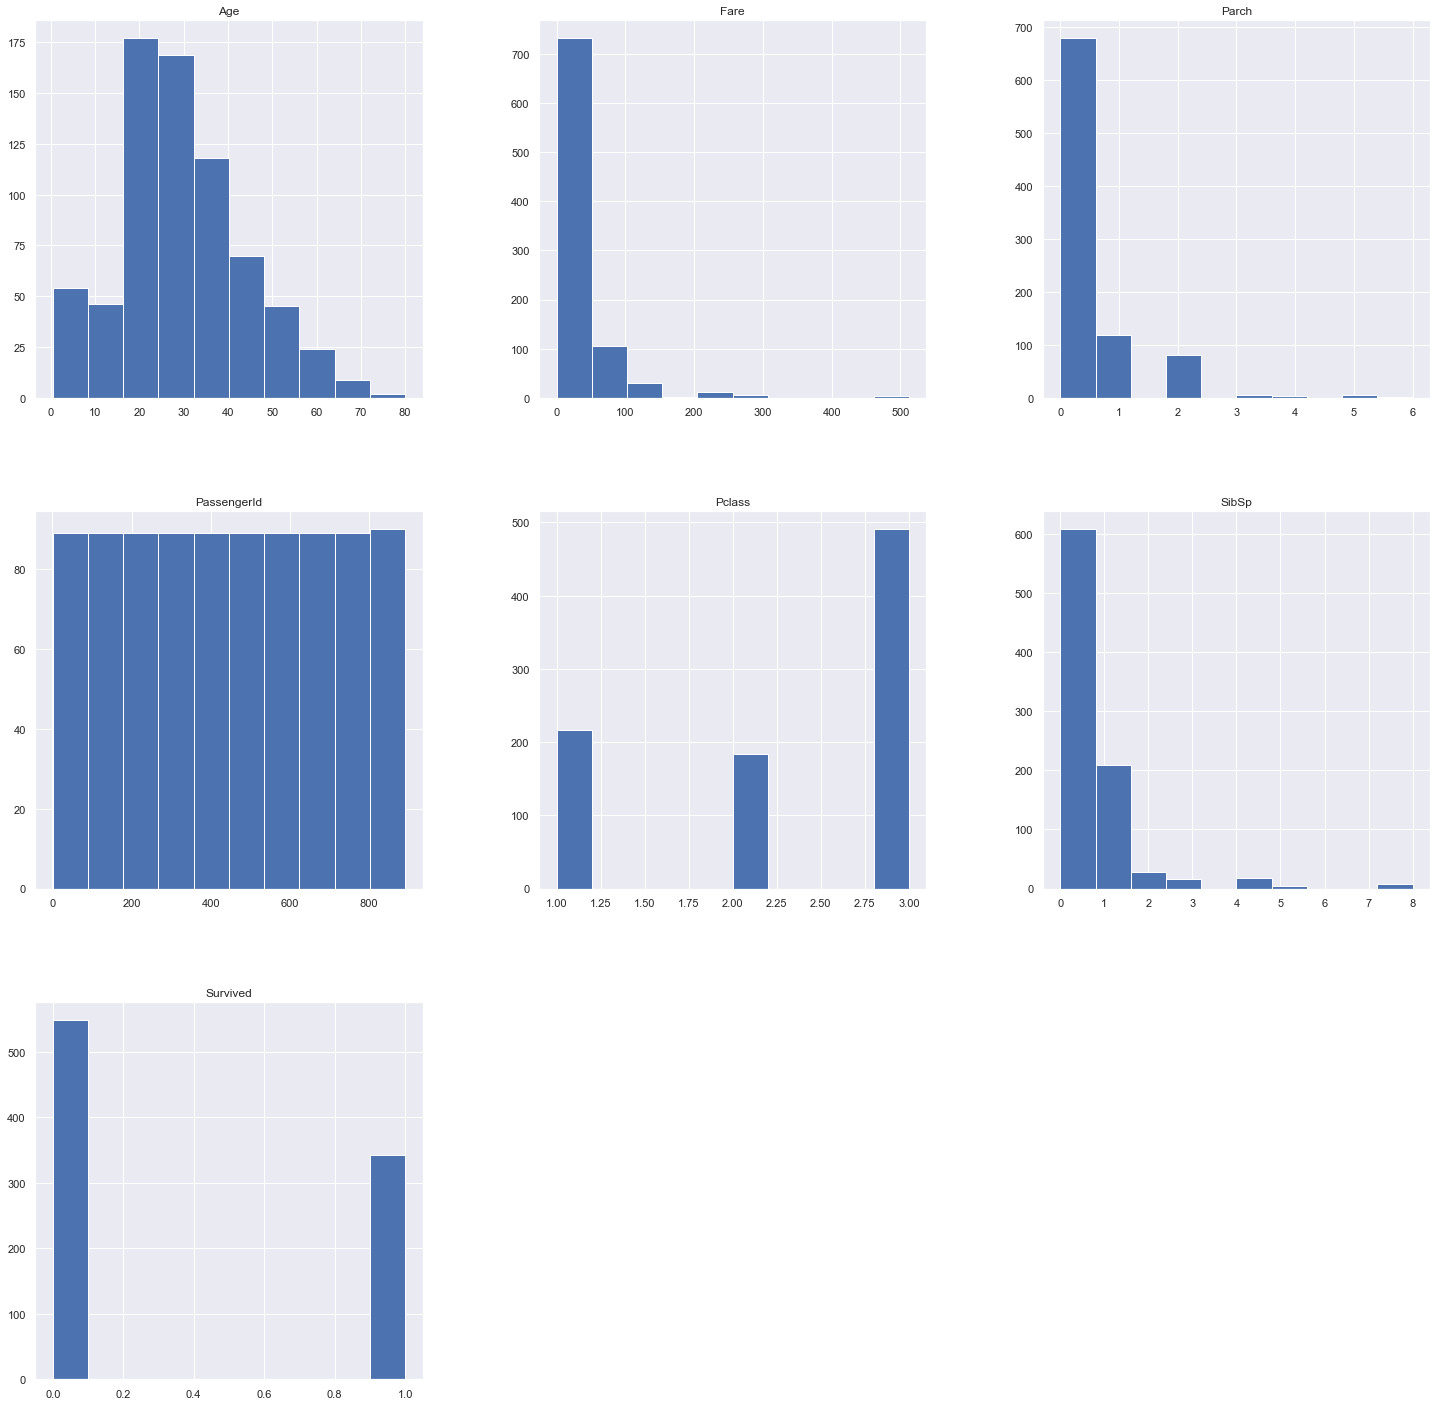

In [10]:
#visual representation of the data using histograms 
titanic_data.hist(figsize = (25, 25))
plt.show()

In [11]:
#overview of the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Nationality  891 non-null    object 
 5   Sex          891 non-null    object 
 6   Age          714 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Cabin        204 non-null    object 
 12  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [12]:
#Insight into the data
print(titanic_data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [13]:
#This gives the column-wise sum of missing values
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Nationality      0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
# We'll drop the following variables as they not needed for predicting 
dataTrain = titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
dataTrain.head()

,Survived,Pclass,Nationality,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,English,male,22.0,1,0,7.2500,S
1,1,1,English,female,38.0,1,0,71.2833,C
2,1,3,Sweden,female,26.0,0,0,7.9250,S
3,1,1,English,female,35.0,1,0,53.1000,S
4,0,3,English,male,35.0,0,0,8.0500,S


In [15]:
# min and max of age for those on board
print('Min Age:', min(dataTrain.Age))
print('Max Age:', max(dataTrain.Age))

Min Age: 0.42
Max Age: 80.0


In [16]:
all_survival = ((dataTrain.Survived.value_counts() * 100)/ len(dataTrain)).round(1).astype(str) + '%'
all_survival.index = ['Died', 'Survived']
all_survival

Died        61.6%
Survived    38.4%
Name: Survived, dtype: object

In [17]:
print('Passenger sexual demographics:')
dataTrain.Sex.value_counts()

Passenger sexual demographics:


male      577
female    314
Name: Sex, dtype: int64

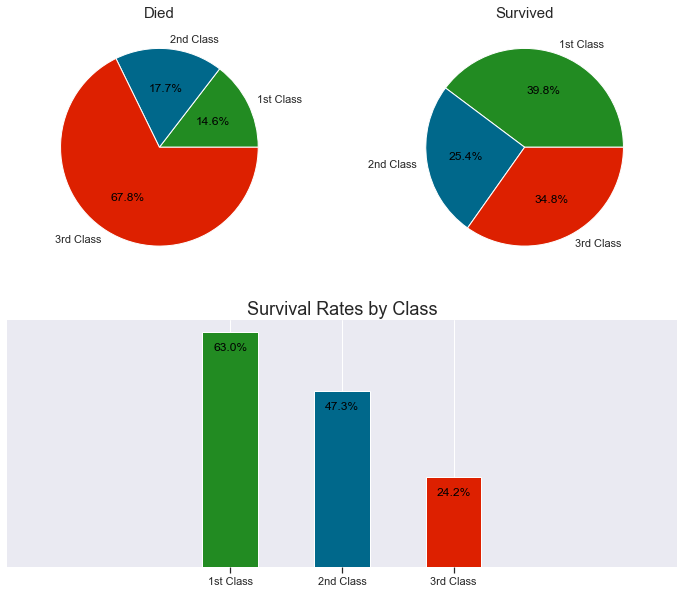

In [18]:
# this code will show the relatioship between class and survival
fig = plt.figure(figsize=(12,10))
gspec = gridspec.GridSpec(2,2)

died = dataTrain[dataTrain.Survived == 0]['Pclass'].value_counts().sort_index()
survived = dataTrain[dataTrain.Survived == 1]['Pclass'].value_counts().sort_index()

class_labels = ['1st Class', '2nd Class', '3rd Class']
class_colors = ['#228b22', '#00688b', '#dd2000']

ax = plt.subplot(gspec[0,0])
_, _, autotexts = plt.pie(died, labels=class_labels, colors=class_colors, autopct='%1.1f%%')
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_size(12)
plt.title('Died', fontsize=15)

ax = plt.subplot(gspec[0,1])
_, _, autotexts = plt.pie(survived, labels=class_labels, colors=class_colors, autopct='%1.1f%%')
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_size(12)
plt.title('Survived', fontsize=15)


ax = plt.subplot(gspec[1,:])

class_survival_rates = list(map(lambda class_num: len(dataTrain[(dataTrain.Pclass == class_num) & (dataTrain.Survived == 1)])/len(dataTrain[dataTrain.Pclass == class_num]),
                                sorted(dataTrain.Pclass.unique())))

#survivors
x_pos = np.arange(len(dataTrain.Pclass.unique()))
plt.bar(x_pos, class_survival_rates, width=0.5, color=class_colors)

for pat in ax.patches:
    ax.annotate(str(round(pat.get_height(), 3) * 100) + '%', (pat.get_x() + pat.get_width()/2, pat.get_height() - 0.05), horizontalalignment='center', color='black')

plt.yticks([])
plt.xticks(x_pos, class_labels)
plt.xlim(-2,4)
plt.tick_params(bottom='off')
for spine in ax.spines.values():
    spine.set_visible(False)
    
plt.title('Survival Rates by Class', fontsize=18)


plt.show()

In [19]:
#Bar Chart for Categorical Features



def bar_chart(feature):
    survived = dataTrain[dataTrain['Survived']==1][feature].value_counts()
    dead = dataTrain[dataTrain['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

Survived :
 S    217
C     93
Q     30
Name: Embarked, dtype: int64
Dead:
 S    427
C     75
Q     47
Name: Embarked, dtype: int64


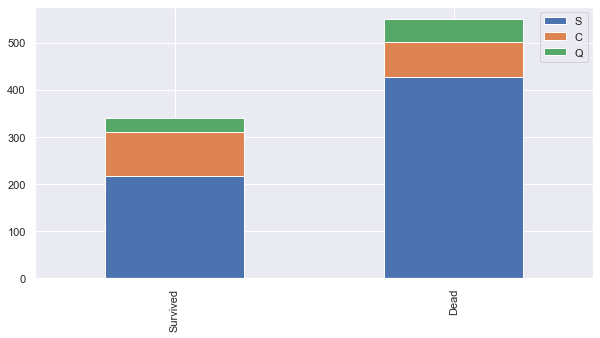

In [20]:
bar_chart('Embarked')
print("Survived :\n",titanic_data[titanic_data['Survived']==1]['Embarked'].value_counts())
print("Dead:\n",titanic_data[titanic_data['Survived']==0]['Embarked'].value_counts())

Survived :
 S    217
C     93
Q     30
Name: Embarked, dtype: int64
Dead:
 S    427
C     75
Q     47
Name: Embarked, dtype: int64


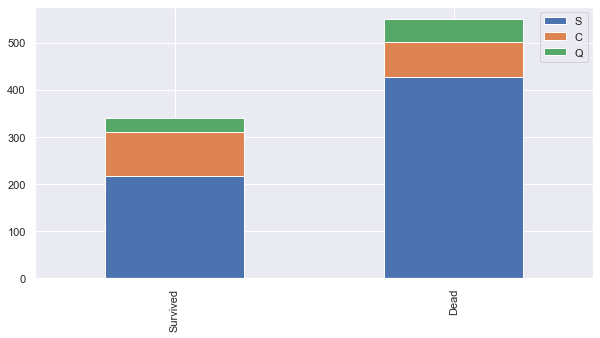

In [21]:
bar_chart('Embarked')
print("Survived :\n",dataTrain[dataTrain['Survived']==1]['Embarked'].value_counts())
print("Dead:\n",dataTrain[dataTrain['Survived']==0]['Embarked'].value_counts())

In [22]:
# Percentage by class 
((dataTrain.Pclass.value_counts()*100 / len(dataTrain)).round(1).astype(str) + '%').sort_index()

1    24.2%
2    20.7%
3    55.1%
Name: Pclass, dtype: object

In [23]:
dataTrain['FamilySize'] = dataTrain['SibSp'] + dataTrain['Parch'] + 1
dataTrain[["FamilySize", "Survived"]].groupby(['FamilySize'], as_index=False).mean()

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [24]:
# Use one hot encoding for Pclass feature
features = preprocessing.OneHotEncoder().fit(dataTrain['Pclass'].to_numpy().reshape(-1,1))\
           .transform(dataTrain['Pclass'].to_numpy().reshape(-1,1)).toarray()

In [25]:
# Use one hot encoding for Pclass feature
from sklearn import preprocessing

# Add gender to features
feature_gender = preprocessing.OneHotEncoder().fit(dataTrain['Sex'].to_numpy().reshape(-1,1))\
           .transform(dataTrain['Sex'].to_numpy().reshape(-1,1)).toarray()
features = np.concatenate((features, feature_gender), axis=1)

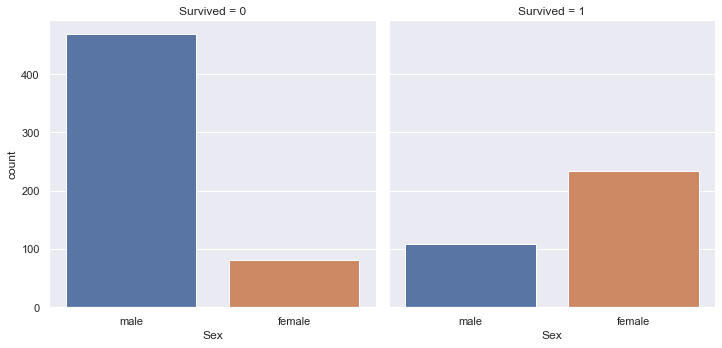

In [26]:
ax = sns.catplot(x="Sex", col="Survived", kind='count', data=dataTrain)

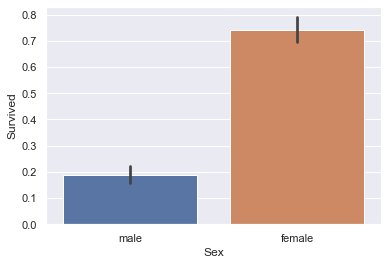

In [27]:
ax = sns.barplot(x="Sex", y="Survived", data=dataTrain)

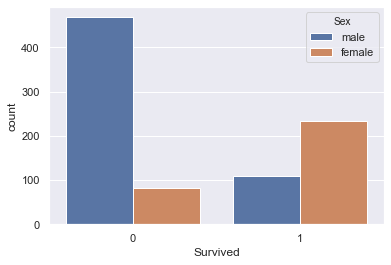

In [28]:
sns.countplot(x = 'Survived', hue = 'Sex', data = dataTrain)

In [29]:
print('Oldest Passeger was of:',dataTrain['Age'].max(),'Years')
print('Youngest Passenger was of:',dataTrain['Age'].min(),'Years')
print('Average Age on the ship:',dataTrain['Age'].mean(),'Years')


Oldest Passeger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


In [30]:
missing_age_bool = pd.isnull(titanic_data['Age'])
titanic_data[missing_age_bool].head()

,PassengerId,Survived,Pclass,Name,Nationality,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",English,male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",English,male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",Portuguese,female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",Malaysia,male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",English,female,NaN,0,0,330959,7.8792,NaN,Q


In [31]:
missing_age_male = titanic_data[missing_age_bool]['Sex']=='male'
missing_age_female = titanic_data[missing_age_bool]['Sex']=='female'
print ('missing age of male - ',missing_age_male.sum())
print ('missing age of female - ',missing_age_female.sum())

missing age of male -  124
missing age of female -  53


In [32]:
youngest_to_survive = titanic_data[titanic_data['Survived'] == 1]['Age'].min()
youngest_to_die = titanic_data[titanic_data['Survived'] == 0]['Age'].min()
oldest_to_survive = titanic_data[titanic_data['Survived'] == 1]['Age'].max()
oldest_to_die = titanic_data[titanic_data['Survived'] == 0]['Age'].max()

print ('Youngest_to_survive - ',youngest_to_survive)
print ('Youngest_to_die - ',youngest_to_die)
print ('Oldest_to_survive - ',oldest_to_survive)
print ('Oldest_to_die - ',oldest_to_die)

Youngest_to_survive -  0.42
Youngest_to_die -  1.0
Oldest_to_survive -  80.0
Oldest_to_die -  74.0


In [33]:
group_by_class_survival = titanic_data.groupby(['Pclass', 'Survived', 'Sex']).size()
print (group_by_class_survival)

Pclass  Survived  Sex   
1       0         female      3
                  male       77
        1         female     91
                  male       45
2       0         female      6
                  male       91
        1         female     70
                  male       17
3       0         female     72
                  male      300
        1         female     72
                  male       47
dtype: int64


In [34]:
def survival(pclass, sex):
    group_by_class = titanic_data.groupby(['Pclass', 'Sex']).size()[pclass, sex].astype('float')
    group_by_class_survived = titanic_data.groupby(['Pclass', 'Survived', 'Sex']).size()[pclass, 1, sex].astype('float')
    
    print ('Total numbers of',sex,'of class',pclass,'-',group_by_class)
    print ('Total numbers of',sex,'of class',pclass,'who survived -',group_by_class_survived)
    survival_rate = ((group_by_class_survived/group_by_class)*100).round(2)
    return survival_rate
    print ('\n\n')
    
print ('Effect of social economy in survival rate : \n')
print ('Class 1 - Male survival rate :\n',survival(1, 'male'),'%\n')
print ('Class 1 - Female survival rate \n:',survival(1, 'female'),'%\n')
print ('-------------\n')
print ('Class 2 - Male survival rate :\n',survival(2, 'male'),'%\n')
print ('Class 2 - Female survival rate:\n',survival(2, 'female'),'%\n')
print ('-------------\n')
print ('Class 3 - Male survival rate :\n',survival(3, 'male'),'%\n')
print ('Class 3 - Female survival rate :\n',survival(3, 'female'),'%\n')

Effect of social economy in survival rate : 

Total numbers of male of class 1 - 122.0
Total numbers of male of class 1 who survived - 45.0
Class 1 - Male survival rate :
 36.89 %

Total numbers of female of class 1 - 94.0
Total numbers of female of class 1 who survived - 91.0
Class 1 - Female survival rate 
: 96.81 %

-------------

Total numbers of male of class 2 - 108.0
Total numbers of male of class 2 who survived - 17.0
Class 2 - Male survival rate :
 15.74 %

Total numbers of female of class 2 - 76.0
Total numbers of female of class 2 who survived - 70.0
Class 2 - Female survival rate:
 92.11 %

-------------

Total numbers of male of class 3 - 347.0
Total numbers of male of class 3 who survived - 47.0
Class 3 - Male survival rate :
 13.54 %

Total numbers of female of class 3 - 144.0
Total numbers of female of class 3 who survived - 72.0
Class 3 - Female survival rate :
 50.0 %



In [35]:
age_below_16 = len(dataTrain[dataTrain['Age']<16])
print ('Total number of passengers below 16 :' ,age_below_16)
age_below_16_survived = len(dataTrain[dataTrain['Age']<16][dataTrain['Survived']==1])
print ('Total number of passengers below 16 who survived :',age_below_16_survived)
print ('\n')

age_below_50 = len(dataTrain[dataTrain['Age']>18][dataTrain['Age']<50])
print ('Total number of passengers below 50 :',age_below_50)
age_below_50_survived = len(dataTrain[dataTrain['Age']>18][dataTrain['Age']<50][dataTrain['Survived']==1])
print ('Total number of passengers below 50 who survived :',age_below_50_survived)
print ('\n')

age_above_50 = len(dataTrain[dataTrain['Age']>50])
print ('Total number of passengers above 50 :',age_above_50)
age_above_50_survived = len(dataTrain[dataTrain['Age']>50][dataTrain['Survived']==1])
print ('Total number of passengers above 50 who survived :',age_above_50_survived)
print ('\n')

print ('Below 16 survival rate :',((float(age_below_16_survived)/age_below_16)*100))
print ('Between 16 and 50 survival rate :',((float(age_below_50_survived)/age_below_50)*100))
print ('Above 50 survival rate :',((float(age_above_50_survived)/age_above_50)*100))

Total number of passengers below 16 : 83
Total number of passengers below 16 who survived : 49


Total number of passengers below 50 : 501
Total number of passengers below 50 who survived : 193


Total number of passengers above 50 : 64
Total number of passengers above 50 who survived : 22


Below 16 survival rate : 59.036144578313255
Between 16 and 50 survival rate : 38.522954091816366
Above 50 survival rate : 34.375


In [36]:
normalized_age_data = dataTrain.dropna()
total_survivors = normalized_age_data[normalized_age_data['Survived']==1]['Age'].count()
total_non_survivors = normalized_age_data[normalized_age_data['Survived']==0]['Age'].count()
total_survivors_mean = normalized_age_data[normalized_age_data['Survived']==1]['Age'].mean()
total_non_survivors_mean = normalized_age_data[normalized_age_data['Survived']==0]['Age'].mean()

print ('Total Survivors : ',total_survivors)
print ('Total Non-Survivors :',total_non_survivors)
print ('Total Survivors Mean Age:',total_survivors_mean)
print ('Total Non-Survivors Mean Age:',total_non_survivors_mean)

Total Survivors :  288
Total Non-Survivors : 424
Total Survivors Mean Age: 28.19329861111111
Total Non-Survivors Mean Age: 30.62617924528302


In [37]:
normalized_age_data.loc[(normalized_age_data['Age']<18),'Age_Category'] = 'Young Aged'
normalized_age_data.loc[(normalized_age_data['Age']>17) & (normalized_age_data['Age']<50),'Age_Category'] = 'Middle Aged'
normalized_age_data.loc[(normalized_age_data['Age']>50),'Age_Category'] = 'Old Aged'

normalized_age_data.head()

,Survived,Pclass,Nationality,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Age_Category
0,0,3,English,male,22.0,1,0,7.2500,S,2,Middle Aged
1,1,1,English,female,38.0,1,0,71.2833,C,2,Middle Aged
2,1,3,Sweden,female,26.0,0,0,7.9250,S,1,Middle Aged
3,1,1,English,female,35.0,1,0,53.1000,S,2,Middle Aged
4,0,3,English,male,35.0,0,0,8.0500,S,1,Middle Aged


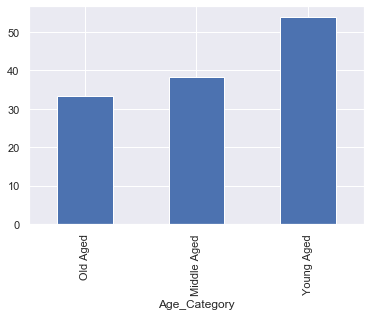

In [38]:
titanic_data_grouped_by_age = normalized_age_data
titanic_data_survival_by_age = (titanic_data_grouped_by_age.groupby(['Age_Category']).Survived.mean()*100).sort_values()
titanic_data_survival_by_age.plot(kind = 'bar')

In [39]:
normalized_age_data.loc[((normalized_age_data['Sex']=="female") & (normalized_age_data['Age']>=18)), 'Category'] = "Woman"
normalized_age_data.loc[(normalized_age_data['Sex']=="male") & (normalized_age_data['Age']>=18), 'Category'] = "Man"
normalized_age_data.loc[(normalized_age_data['Age'] < 18),"Category"] = "Child"

normalized_age_data.head()

,Survived,Pclass,Nationality,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Age_Category,Category
0,0,3,English,male,22.0,1,0,7.2500,S,2,Middle Aged,Man
1,1,1,English,female,38.0,1,0,71.2833,C,2,Middle Aged,Woman
2,1,3,Sweden,female,26.0,0,0,7.9250,S,1,Middle Aged,Woman
3,1,1,English,female,35.0,1,0,53.1000,S,2,Middle Aged,Woman
4,0,3,English,male,35.0,0,0,8.0500,S,1,Middle Aged,Man


In [40]:
print (normalized_age_data.groupby(['Category', 'Survived']).size())

Category  Survived
Child     0            52
          1            61
Man       0           325
          1            70
Woman     0            47
          1           157
dtype: int64


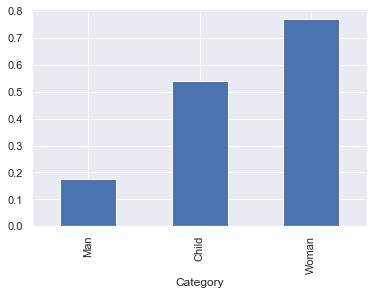

In [41]:
normalized_age_grouped_by_category = normalized_age_data.groupby('Category')
normalized_age_grouped_by_category_survival = normalized_age_grouped_by_category.Survived.mean().sort_values()
normalized_age_grouped_by_category_survival.plot(kind = 'bar')

In [42]:
children_with_childcarer = normalized_age_data[normalized_age_data['Category']=='Child'][normalized_age_data['Parch']==0]
children_with_parents = normalized_age_data[normalized_age_data['Category']=='Child'][normalized_age_data['Parch'] > 0]

print ('Number of childern with childcarer:',children_with_childcarer['Survived'].count())
print ('Number of childern with childcarer who survived:',children_with_childcarer[children_with_childcarer['Survived']==1]['Survived'].count())

print ('Number of childern with childcarer:',children_with_parents['Survived'].count())
print ('Number of childern with childcarer who survived:',\
children_with_parents[children_with_parents['Survived']==1]['Survived'].count())


Number of childern with childcarer: 32
Number of childern with childcarer who survived: 16
Number of childern with childcarer: 81
Number of childern with childcarer who survived: 45


In [43]:
print ('Percentage of children who survived with nanny:',\
(float(children_with_childcarer[children_with_childcarer['Survived']==1]['Survived'].count())/children_with_childcarer['Survived'].count())*100)

print ('Mean age of children who survived with nanny:',\
children_with_childcarer[children_with_childcarer['Survived']==1]['Age'].mean())

Percentage of children who survived with nanny: 50.0
Mean age of children who survived with nanny: 14.6875


In [44]:
print ('Percentage of children who survived with parents:',\
(float(children_with_parents[children_with_parents['Survived']==1]['Survived'].count())/\
children_with_parents['Survived'].count())*100)

print ('Mean age of children who survived with parents:',\
children_with_parents[children_with_parents['Survived']==1]['Age'].mean())

Percentage of children who survived with parents: 55.55555555555556
Mean age of children who survived with parents: 5.470444444444444


In [45]:

normalized_age_data.loc[((normalized_age_data['Parch']==0) & (normalized_age_data['Category']=='Child')), 'childcarer_parents'] = 'With_childcarer'
normalized_age_data.loc[((normalized_age_data['Parch']>0) & (normalized_age_data['Category']=='Child')),'childcarer_parents']='Without_childcarer'

normalized_age_data.head()

,Survived,Pclass,Nationality,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Age_Category,Category,childcarer_parents
0,0,3,English,male,22.0,1,0,7.2500,S,2,Middle Aged,Man,NaN
1,1,1,English,female,38.0,1,0,71.2833,C,2,Middle Aged,Woman,NaN
2,1,3,Sweden,female,26.0,0,0,7.9250,S,1,Middle Aged,Woman,NaN
3,1,1,English,female,35.0,1,0,53.1000,S,2,Middle Aged,Woman,NaN
4,0,3,English,male,35.0,0,0,8.0500,S,1,Middle Aged,Man,NaN


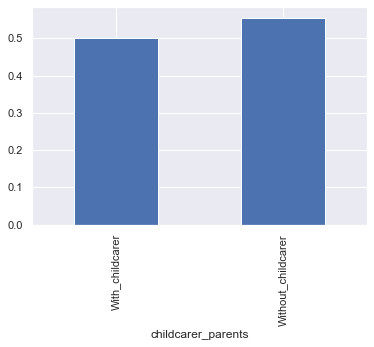

In [46]:
normalized_age_data_childcarer_group = normalized_age_data.groupby('childcarer_parents').Survived.mean()
normalized_age_data_childcarer_group.plot(kind = 'bar')

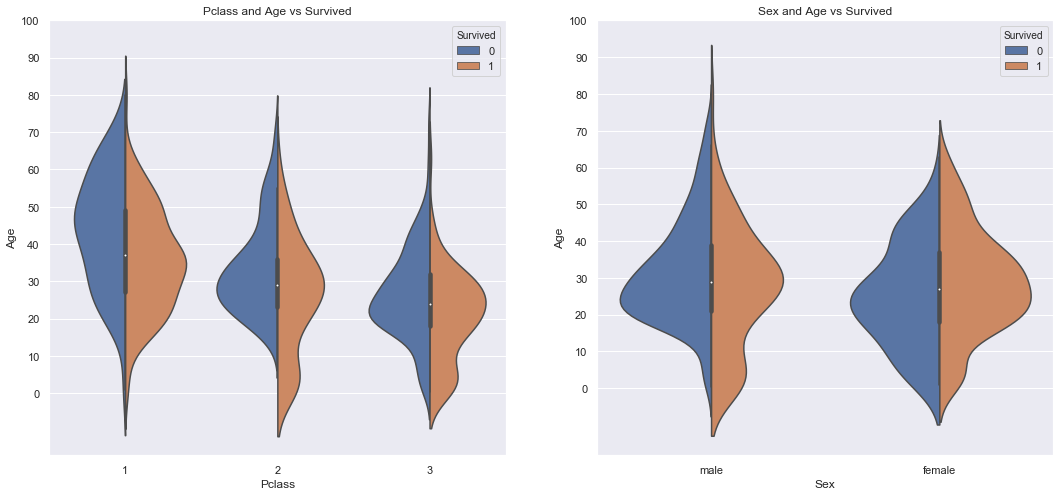

In [47]:
# Violin plot
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=dataTrain,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=dataTrain,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [48]:
# a lot of data for the 'Age' column are missing, fill with median value
median_age = dataTrain.loc[dataTrain['Age'].notna(), 'Age'].median()
feature_age= dataTrain['Age'].copy()
feature_age[feature_age.isna()] = median_age
features = np.concatenate((features, feature_age.to_numpy().reshape((-1, 1))), axis=1)

Text(0.5, 0, 'Age')

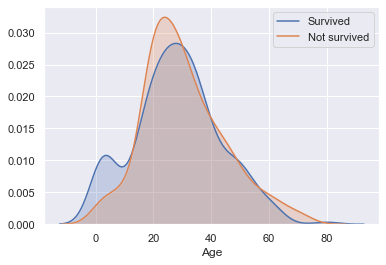

In [49]:
ax = sns.kdeplot(dataTrain.loc[dataTrain['Survived'] == 1, 'Age'], label="Survived", shade=True)
ax = sns.kdeplot(dataTrain.loc[dataTrain['Survived'] == 0, 'Age'], label="Not survived", shade=True)
ax.set_xlabel("Age")

In [50]:
# Constructing a Decision Tree Model

In [51]:
# print feature dtypes 
dataTrain.dtypes

Survived         int64
Pclass           int64
Nationality     object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
FamilySize       int64
dtype: object

In [52]:
#TSplit the data to train and Test creating Dummy Variables
feature_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
dataTrain = dataTrain[feature_cols + ['Survived']].dropna()
dataTrain['Sex'] = LabelEncoder().fit_transform(dataTrain.Sex)
dataTrain['Embarked'] = LabelEncoder().fit_transform(dataTrain.Embarked)
X_train, X_test, y_train, y_test = train_test_split(dataTrain[feature_cols], dataTrain.Survived, random_state=0)

In [53]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
138,3,1,16.0,0,0,9.2167,2
619,2,1,26.0,0,0,10.5000,2
130,3,1,33.0,0,0,7.8958,0
621,1,1,42.0,1,0,52.5542,2
676,3,1,24.5,0,0,8.0500,2
...,...,...,...,...,...,...,...
885,3,0,39.0,0,5,29.1250,1
239,2,1,33.0,0,0,12.2750,2
791,2,1,16.0,0,0,26.0000,2
705,2,1,39.0,0,0,26.0000,2


In [54]:
# Master parameters 
rstate = 27 # Random State used 
n_splits = 2 # Cross Validation Splits
scoring = 'accuracy' # Model Selection during Cross-Validation
s_a = pd.Series(np.ones(2))

In [55]:
# Stratified Cross-Validation
cv = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=rstate)

In [56]:
# Depedent and Indepedent Variables
X = dataTrain.drop(["Survived"] , axis=1)
y = dataTrain["Survived"]
print("X, Y, Test Shape:",X.shape, y.shape, dataTest.shape) # Data Dimensions

# Storage for Model and Results
results = pd.DataFrame(columns=['Model','Para','Test_Score','CV Mean','CV STDEV'])
ensemble_models= {}

X, Y, Test Shape: (712, 7) (712,) (418, 12)


In [57]:
print("Feature Count (With One Hot Encoding):", X.shape[1])

Feature Count (With One Hot Encoding): 7


In [58]:
# Helper Function to visualize feature importance
plt.rcParams['figure.figsize'] = (8, 4)
predictors = [x for x in X.columns if x not in ['Survived']]
def feature_imp(model):
    MO = model.fit(X_train, y_train)
    feat_imp = pd.Series(MO.feature_importances_, predictors).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [59]:
# Baseline Decision Tree

Mean CV Accuracy: 0.7797202797202798


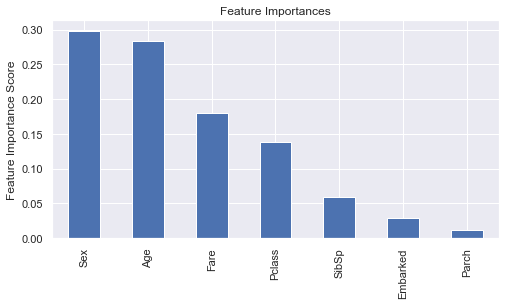

In [60]:
tree = DecisionTreeClassifier()
print("Mean CV Accuracy:",cross_val_score(tree, X, y, cv=cv, scoring=scoring).mean())
feature_imp(tree)

In [61]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print('Accuracy on training set:',tree.score(X_train, y_train))
print('Accuracy on test set:',tree.score(X_test, y_test))
print('Area under the ROC curve score on test set:',roc_auc_score(y_test, tree.predict_proba(X_test)[:, 1]))

Accuracy on training set: 0.9925093632958801
Accuracy on test set: 0.7528089887640449
Area under the ROC curve score on test set: 0.7631237006237006


In [62]:
forest = GradientBoostingClassifier(learning_rate=0.1, max_depth=4, random_state=0)
forest.fit(X_train, y_train)

print('Accuracy on training set:',forest.score(X_train, y_train))
print('Accuracy on test set:',forest.score(X_test, y_test))
print('Area under the ROC curve score on test set:',roc_auc_score(y_test, forest.predict_proba(X_test)[:, 1]))

Accuracy on training set: 0.9569288389513109
Accuracy on test set: 0.8258426966292135
Area under the ROC curve score on test set: 0.8682432432432432


In [63]:
feature_importances = dict(zip(feature_cols, forest.feature_importances_))
sorted_importances = sorted(list(feature_importances.items()), key=lambda x: x[1], reverse=True)

print("Feature\t\tSignificance")
print("-------\t\t----------")
for feature, importance in sorted_importances:
    padding = "\t\t" if len(feature) <= 6 else "\t"
    print(feature, padding, importance)

Feature		Significance
-------		----------
Sex 		 0.3637942630001166
Age 		 0.20495161838485887
Fare 		 0.19442072702121424
Pclass 		 0.1518459952897191
SibSp 		 0.058897347742927604
Parch 		 0.013564293184258952
Embarked 	 0.012525755376904596


Text(0.5, 0, 'Family size')

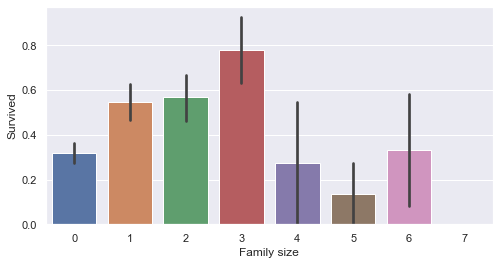

In [64]:
ax = sns.barplot(x=dataTrain['SibSp'] + dataTrain['Parch'], y=dataTrain['Survived'], data=dataTrain)
ax.set_xlabel("Family size")

In [65]:
print ('Percentage of children who survived with parents:',\
(float(children_with_parents[children_with_parents['Survived']==1]['Survived'].count())/\
children_with_parents['Survived'].count())*100)

print ('Mean age of children who survived with parents:',\
children_with_parents[children_with_parents['Survived']==1]['Age'].mean())

Percentage of children who survived with parents: 55.55555555555556
Mean age of children who survived with parents: 5.470444444444444


In [66]:
def add_percent_labels(ax):
    for pat in ax.patches:
        if pat.get_height() > 0.05:
            height_offset = -0.02
            color = "white"
        else:
            height_offset = 0.01
            color = "#1f77b4"

        rounded_importance_label = str((int(round(pat.get_height(), 3) * 1000)) / 10) + '%'
        ax.annotate(
            rounded_importance_label, (pat.get_x() + pat.get_width()/2, pat.get_height() + height_offset),
            horizontalalignment='center',
            color=color
        )

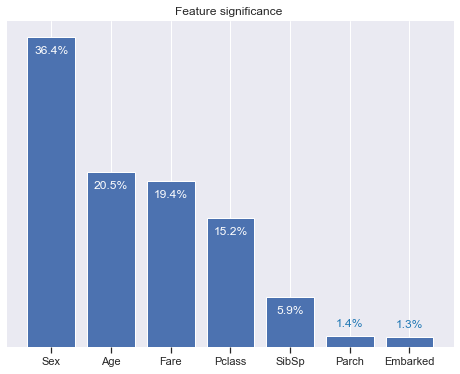

In [67]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

features = [x[0] for x in sorted_importances]
importances = [x[1] for x in sorted_importances]

x_pos = np.arange(len(sorted_importances))
plt.bar(x_pos, importances)


plt.yticks([])
plt.xticks(x_pos, features)
plt.tick_params(bottom='off')
for spine in ax.spines.values():
    spine.set_visible(False)
    
add_percent_labels(ax)

plt.title('Feature significance ')

plt.show()

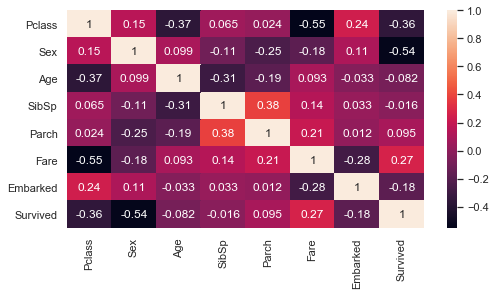

In [68]:
sns.heatmap(dataTrain.corr(), annot = True)

In [69]:
# Now build logestic regression module 

In [70]:
# We'll use a logistic regression model again, to be consistent, no need for complex models yet!

logisticRegression = LogisticRegression(max_iter = 10000)
logisticRegression.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
# Predict!
predictions = logisticRegression.predict(X_test)

In [72]:
print(predictions)

[0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1
 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0]


In [73]:
round(np.mean(predictions), 2)

0.37

In [74]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))

[[90 14]
 [23 51]]


In [75]:
#explaination of confusion matrix 
# 90 is the resulting number of True Positives(TP)
# 14 is the resulting number of False Positives(FP)
# 23 is the resulting number of False Negatives(FN)
# 51 is the resulting number of True Negatives(TN)


In [76]:
accuracy = (91 + 50) / (91 + 9 + 29 + 50)
print('accuracy is: ' + str(round(accuracy, 2)))

accuracy is: 0.79


In [77]:
# Completed... 